# Convert CRY files to RGB

In [15]:
from IPython.display import display, HTML
#Enable horizontal scrolling on output
#display(HTML("<style>pre { white-space: pre !important; }</style>"))

# Increase the width
display(HTML("<style>.container { width:80% !important; }</style>"))


Convert cry files to rgb arrays that we can use to create and extract images.

In [10]:
CRY_RGB = [
[
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [34,34,34,34,34,34,34,34,34,34,34,34,34,34,19,0],
    [68,68,68,68,68,68,68,68,68,68,68,68,64,43,21,0],
    [102,102,102,102,102,102,102,102,102,102,102,95,71,47,23,0],
    [135,135,135,135,135,135,135,135,135,135,135,104,78,52,26,0],
    [169,169,169,169,169,169,169,169,169,170,141,113,85,56,28,0],
    [203,203,203,203,203,203,203,203,203,203,153,122,91,61,30,0],
    [237,237,237,237,237,237,237,237,230,197,164,131,98,65,32,0],
    [255,255,255,255,255,255,255,255,247,214,181,148,115,82,49,17],
    [255,255,255,255,255,255,255,255,255,235,204,173,143,112,81,51],
    [255,255,255,255,255,255,255,255,255,255,227,198,170,141,113, 85],
    [255,255,255,255,255,255,255,255,255,255,249,223,197,171,145,119],
    [255,255,255,255,255,255,255,255,255,255,255,248,224,200,177,153],
    [255,255,255,255,255,255,255,255,255,255,255,255,252,230,208,187],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,240,221],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255]
    ],
[
    [0,17,34,51,68,85,102,119,136,153,170,187,204,221,238,255],
    [0,19,38,57,77,96,115,134,154,173,192,211,231,250,255,255],
    [0,21,43,64,86,107,129,150,172,193,215,236,255,255,255,255],
    [0,23,47,71,95,119,142,166,190,214,238,255,255,255,255,255],
    [0,26,52,78,104,130,156,182,208,234,255,255,255,255,255,255],
    [0,28,56,85,113,141,170,198,226,255,255,255,255,255,255,255],
    [0,30,61,91,133,153,183,214,244,255,255,255,255,255,255,255],
    [0,32,65,98,131,164,197,230,255,255,255,255,255,255,255,255],
    [0,32,65,98,131,164,197,230,255,255,255,255,255,255,255,255],
    [0,30,61,91,133,153,183,214,244,255,255,255,255,255,255,255],
    [0,28,56,85,113,141,170,198,226,255,255,255,255,255,255,255],
    [0,26,52,78,104,130,156,182,208,234,255,255,255,255,255,255],
    [0,23,47,71,95,119,142,166,190,214,238,255,255,255,255,255],
    [0,21,43,64,86,107,129,150,172,193,215,236,255,255,255,255],
    [0,19,38,57,77,96,115,134,154,173,192,211,231,250,255,255],
    [0,17,34,51,68,85,102,119,136,153,170,187,204,221,238,255]
],
[
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,240,221],
    [255,255,255,255,255,255,255,255,255,255,255,255,252,230,208,187],
    [255,255,255,255,255,255,255,255,255,255,255,248,224,200,177,153],
    [255,255,255,255,255,255,255,255,255,255,249,223,197,171,145,119],
    [255,255,255,255,255,255,255,255,255,255,227,198,170,141,113,85],
    [255,255,255,255,255,255,255,255,255,235,204,173,143,112,81,51],
    [255,255,255,255,255,255,255,255,247,214,181,148,115,82,49,17],
    [237,237,237,237,237,237,237,237,230,197,164,131,98,65,32,0],
    [203,203,203,203,203,203,203,203,203,203,153,122,91,61,30,0],
    [169,169,169,169,169,169,169,169,169,170,141,113,85,56,28,0],
    [135,135,135,135,135,135,135,135,135,135,135,104,78,52,26,0],
    [102,102,102,102,102,102,102,102,102,102,102,95,71,47,23,0],
    [68,68,68,68,68,68,68,68,68,68,68,68,64,43,21,0],
    [34,34,34,34,34,34,34,34,34,34,34,34,34,34,19,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]
]

In [8]:
import math
from PIL import Image, ImageColor
import numpy as np

def saturate(c,intensity):
    # Modify them using the intensity value
    c = c * (intensity / 255.0)
    c = math.ceil(c+0.5)
    # Clamp the value between 0 and 255
    return max(0, min(c,255))
    
def cry_to_rgb(d):
    # For example value of d: 0x1A20
    intensity = d & 0xFF   # get the intensity: 0x20
    cr1 = (d >> 12) & 0xF  # get index 1: 0x0A (10)
    cr2 = (d >> 8) & 0xF   # get index 2: 0x01 (1)
    
    # Use the indices to get the RGB values from our
    # lookup table
    r = CRY_RGB[0][cr1][cr2]
    g = CRY_RGB[1][cr1][cr2]
    b = CRY_RGB[2][cr1][cr2]

    # Ensure we get a valid rgb value between 0 and 255
    r1 = saturate(r, intensity)
    g1 = saturate(g, intensity)
    b1 = saturate(b, intensity)

    return (r1,g1,b1)

def getPixels(file_name):
    width = 320
    cry_pixels = open(file_name,'rb').read()
    rgb_pixels = []
    for i in range(0, len(cry_pixels),2):
        t = cry_pixels[i:i+2]
        #print(i,t,int.from_bytes(t,'little'))
        rgb = cry_to_rgb(int.from_bytes(t,'big'))
        rgb_pixels += [rgb]
    pixels = np.array(rgb_pixels).astype(np.uint8)
    pixels.shape = (-1,width,3)
    return pixels

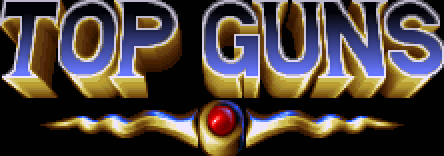

In [9]:
pixels = getPixels('cry/beasty7.cry')
subpixels = pixels[1:79,1:223]
img = Image.fromarray(subpixels,mode='RGB')
img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)
img

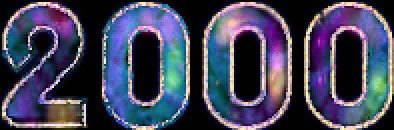

In [5]:
pixels = getPixels('cry/beasty7.cry')
subpixels = pixels[84:84+65,4:4+197]
img = Image.fromarray(subpixels,mode='RGB')
img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)
img


In [6]:
0xa4

164

In [7]:
hex(0xa4-0x91)

'0x13'

In [8]:
pixels = getPixels('cry/beasty4.cry')
subpixels = pixels[0xa4:0xa4+0x12,0x01:0x01+0x0f]
img = Image.fromarray(subpixels,mode='RGB')
img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)
img


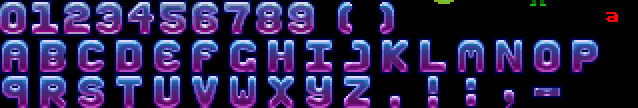

In [19]:
pixels = getPixels('cry/beasty4.cry')
subpixels = pixels[0x91:0x91+54,0x01:0x01+320]
img = Image.fromarray(subpixels,mode='RGB')
img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)
img


## Render a cry file

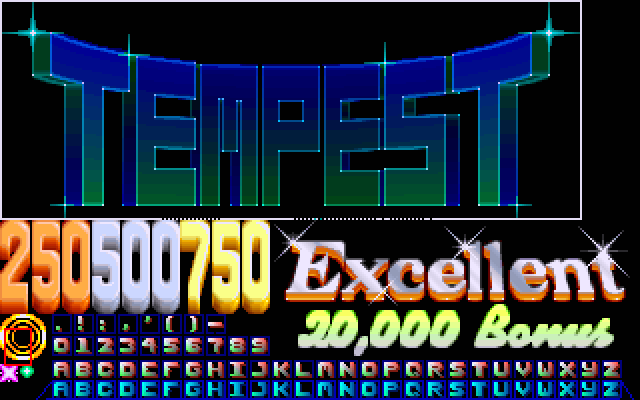

In [15]:
from PIL import ImageDraw
pixels = getPixels('cry/beasty3.cry')
subpixels = pixels
img = Image.fromarray(subpixels,mode='RGB')

draw = ImageDraw.Draw(img)
draw.rectangle(((0x02, 0xa4), (0x0f, 0xa4+0x12)), outline="red")

img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)
img


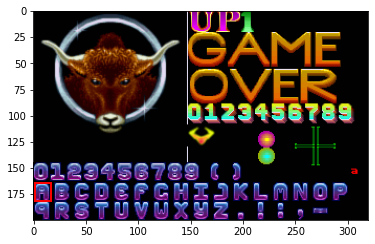

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

pixels = getPixels('cry/beasty4.cry')
subpixels = pixels
im = Image.fromarray(subpixels,mode='RGB')

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((0x01, 0xa4), 0x0f, 0x12, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [12]:
hex(182)

'0xb6'

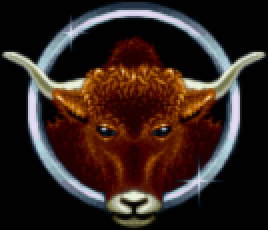

In [13]:
"""
lea pic2,a2                                       
move.l #$030007,d0  ;srce start pixel address     
move.l #$730086,d1  ;srce size                    
"""
pixels = getPixels('cry/beasty4.cry')
subpixels = pixels[0x03:0x03+0x73,0x07:0x07+0x86]
img = Image.fromarray(subpixels,mode='RGB')
img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)
img


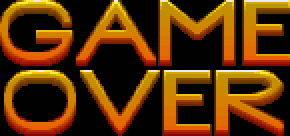

In [14]:
"""
move.l #pic2,(a0)+  ;srce screen for effect       
move.l #$150094,(a0)+  ;srce start pixel address  
move.l #$440091,(a0)+  ;srce size                 
"""
pixels = getPixels('cry/beasty4.cry')
subpixels = pixels[0x15:0x15+0x44,0x94:0x94+0x91]
img = Image.fromarray(subpixels,mode='RGB')
img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)
img


;      _^/|)i%%%%%ii|"^,            `_,;>i%%%%%%%%%%%i)\";`                 _;"\))%%%%%%vii^,            ._:;<i%%%%%%%%%%%i)\";_                 `;"\>)%%%%%%vii^;                  ,^\<ii%%%%%vvi<;_     
;   .:\Iz5qbYbbbbbYYgmzt\+.         ``*zVXbbbbbbbbbbbggE5jl\-.           ._\s7p4bYbbbbbO8YYCu\/.         .`lzgXZbbbbbbbbbbXgE6j{\_.           .-\l72EZYbbbbbk8kYfT<|.            .=\tzdEYYbbbbb&&YE#!):.  
; `_|r#2h5y#T77777n#yygm#1";`.      ``zVJTTn7zz777777zu3w##Ji|``       `_|c2Fh5y##z7777uTwy233u<+..      .`1dCTTn7zz777777zL3f##J%|_`       ``|i35hFyJ#z7777LTwy33y#>"..      .`;"o3qSyf#n77777T#yy232}>'`
; _^tLmu1*sll{{{{{rls{1o6Ct>-.      ``7go1I*lllr{{{{slrs*}t7LL'_       _,1zgJ1Isll{{{{{srss*}jup?`.      .`[hz1I}lllr{{{{{rrs{}tzuT;_       _'1oSf[Islls{{{{srsr{*juFt``      .->tfSo1{slr{{{{{rrs{{[jCF/-
; -/qJI{lx%{{*?e]**{c%lrIoS{`.      ``15!*rlxl***1a}*{s%crrr1t'_       -;6wI*lc%{*?!7a?[t*s}I}[f*`.      .`I5[*rlxc*}?a7!?*{%cl?tJ3;_       _'FyI*lc%s{*}a1{?1}s}II!w]``      .`{SoIrl%c{**]

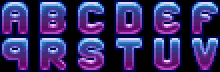

In [31]:
from ascii_magic import AsciiArt
from ascii_magic import AsciiArt

pixels = getPixels('cry/beasty4.cry')
subpixels = pixels[0xA4:0xA4+54,0x01:0x01+110]
img = Image.fromarray(subpixels,mode='RGB')
img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=200, monochrome=False)
print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))

img


;  |?eat]!!!!!]][tojTJJTj7jnu7[r)|=^^=====/).\|^="<cI[1]!![tojTJJTj7jnJwww#uoe!=====/).\|^="<cI[1]!![tojTJJTj7jnJwww#uoe!=
;  |umfe[???III}*I!t7uTnzetonJJCJa%;      _).<^'>!jTLo1]?II![e7uTnzetoLT###LCy1     _).<^'>!jTLo1]?II![e7uTnzetoLT###LCy1 
;  |7yo<\\\))||""//+++====^^=="ie#u[)     _).\)lajtc<||))||""/++====^^^^;;;,sL!     _).\)lajtc<||))||""/++====^^^^;;;,sL! 
;  |tT1>>>%lls{{srrs{ssrlx%%>/=^,*oL1     _).|!7tr||\<ixxxxcrs{ssrlx%vvvvii%}za     _).|!7tr||\<ixxxxcrs{ssrlx%vvvvii%}za 
;  |]7!<<<%sr)))||)))))||"<vrr>^^+15n     _).|]z!\<<iclv>|"|)))))||""""""/"|)><     _).|]z!\<<iclv>|"|)))))||""""""/"|)>< 
;  )?1{<\\%Is`-----------_:^v?*;;,tgw     _).)?1{<<\%I{;'-```..````````---___''     _).)?1{<<\%I{;'-```..````````---___'' 
;  ){Ic\\)rtI             .-vt?,;:7Ef     _).){Ic\\)s7To1I{s*?}srrrrl%;             _).){Ic\\)s7To1I{s*?}srrrrl%;         
;  )lli))|*z[               xj1,,'jgJ     _).)lli))|x!t7t]I{r*I*rllr1t"             _).)lli))|x!t7t]I{r*I*rllr1t"         
;  )%%i||"?u[   

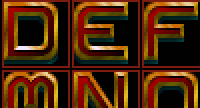

In [46]:
from ascii_magic import AsciiArt

pixels = getPixels('cry/beasty8.cry')
subpixels = pixels[0:0+54,0x68:0x68+100]
img = Image.fromarray(subpixels,mode='RGB')
img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=120, monochrome=False)
print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))

img


;      -''''''''''''''''''''''''''''''''''''''''''''''''''''''     -''''''''''''''''''''''''''''''''''''''''''''''''''''''
;      -''''''''''''''''''''''''''''''''''''''''''''''''''''''     -''''''''''''''''''''''''''''''''''''''''''''''''''''''
;      -'''',%%%%ij2333ywwwwfTLuuujeeeeettttt{"||||-````-'''''     -''''=yyyyy33333ywwwwfTLuuujeeeeettttt{"||||-````-'''''
;      -'''';!!!!}XRNNNWKKKKKkGGGZXSSSSS6ppp6u>iiii`    `'''''     -''''|WWWWWNNNNNWKKKKKkGGGZXSSSSS6ppp6u>iiii`    `'''''
;      -''''^uuuujXDKKKKUUUUUZXXXXEqSSSSF5FFFucllll_````-'''''     -''''|DDDDDHKKKKKUUUUUZXXXXEqSSSSF5FFFucllll_````-'''''
;      -''''|MMMMMUkkkkkOOOOAX4444dggggh53222fTTTTT";^^^,'''''     -''''|MMMMMUkkkkkOOOOAX4444dggggh53222fTTTTT";^^^,'''''
;      -''''|MMMMMUkkkkkAAAAAX44444ghhhh53222fTTTTT";^^^,'''''     -''''|MMMMMUkkkkkAAAAAX44444ghhhh53222fTTTTT";^^^,'''''
;      -''''|DDDDD$&&&8PI????I}}}}}****{#yyyyCuuuuui<<<>/'''''     -''''|DDDDD$&&&8PI????I}}}}}****{#yyyyCuuuuui<<<>/'''''
;      -''''"KKK

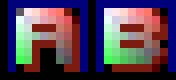

In [78]:
from ascii_magic import AsciiArt

pixels = getPixels('cry/beasty3.cry')
x = 25
y = 180
subpixels = pixels[y:y+10,x:x+22]
img = Image.fromarray(subpixels,mode='RGB')
img = img.resize((img.width * 8, img.height * 8), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=120, monochrome=False)
print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))

img


# Rough Work

In [3]:
import cry_rgb as cry
from PIL import Image, ImageColor
import numpy as np
from ascii_magic import AsciiArt

width = 320
scale = 8
file_name = 'cry/beasty4.cry'
cry_pixels = open(file_name,'rb').read()[4:]

pixels = cry.getPixels(cry_pixels,width)
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=120, monochrome=True)
print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))

img

AttributeError: module 'cry_rgb' has no attribute 'getPixels'